

This project was independently implemented as a learning-focused research exercise using publicly available Indian air quality data.



# Explainable Machine Learning for AQI Prediction

**Author:** Subhangi Panigrahi  
**Domain:** Machine Learning / Environmental Analytics  
**Tools:** Python, Scikit-learn, SHAP, Google Colab  

---

###  Objective
To predict Air Quality Index (AQI) using environmental pollutant data and apply explainable machine learning techniques to interpret model predictions.

##    Project Workflow

1. Dataset Description  
2. Data Exploration & Cleaning  
3. Feature Selection  
4. Model Building  
5. Model Evaluation  
6. Explainable AI (SHAP)  
7. Results & Conclusion


In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Dataset Description

The dataset contains daily air quality information for an Indian city, including key pollutants such as PM2.5, PM10, NO₂, SO₂, CO, and O₃.  
The target variable is Air Quality Index (AQI), which represents overall air pollution levels.



In [3]:
df = pd.read_csv("/content/Delhi_AQI_Dataset.csv")
df.head()

,City,Date,AQI,PM2.5,PM10,NO2,SO2,CO,O3,Unnamed: 9,Unnamed: 10
0,Delhi,01/01/18,406,223.3,438.48,336.98,462.84,4.26,385.7,NaN,NaN
1,Delhi,02/01/18,418,229.9,451.44,346.94,476.52,4.39,397.1,NaN,NaN
2,Delhi,03/01/18,382,210.1,412.56,317.06,435.48,4.01,362.9,NaN,NaN
3,Delhi,04/01/18,366,201.3,395.28,303.78,417.24,3.84,347.7,NaN,NaN
4,Delhi,05/01/18,390,214.5,421.20,323.70,444.60,4.10,370.5,NaN,NaN


In [4]:
df.shape

(2191, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2191 non-null   object 
 1   Date         2191 non-null   object 
 2   AQI          2191 non-null   int64  
 3   PM2.5        2191 non-null   float64
 4   PM10         2191 non-null   float64
 5   NO2          2191 non-null   float64
 6   SO2          2191 non-null   float64
 7   CO           2191 non-null   float64
 8   O3           2191 non-null   float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(8), int64(1), object(2)
memory usage: 188.4+ KB


In [6]:
df.describe()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,Unnamed: 9,Unnamed: 10
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,0.0,0.0
mean,208.285714,114.557143,224.948571,172.877143,237.445714,2.187307,197.871429,NaN,NaN
std,106.614654,58.638060,115.143827,88.490163,121.540706,1.119494,101.283922,NaN,NaN
min,41.000000,22.550000,44.280000,34.030000,46.740000,0.430000,38.950000,NaN,NaN
25%,117.000000,64.350000,126.360000,97.110000,133.380000,1.230000,111.150000,NaN,NaN
50%,190.000000,104.500000,205.200000,157.700000,216.600000,2.000000,180.500000,NaN,NaN
75%,289.000000,158.950000,312.120000,239.870000,329.460000,3.030000,274.550000,NaN,NaN
max,494.000000,271.700000,533.520000,410.020000,563.160000,5.190000,469.300000,NaN,NaN


## 2. Data Cleaning & Preprocessing

Environmental datasets often contain missing or noisy values.  
To ensure robust model training, missing values were handled using mean imputation.

In [7]:
df.isnull().sum()

,0
City,0
Date,0
AQI,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0
Unnamed: 9,2191


In [8]:
df.drop(df.filter(regex="Unnamed"),axis=1,inplace=True)

In [9]:
df.isnull().sum()

,0
City,0
Date,0
AQI,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0


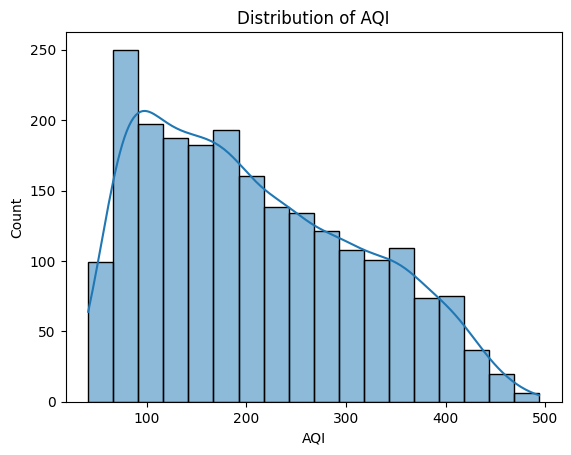

In [10]:
plt.figure()
sns.histplot(df['AQI'], kde=True)
plt.title("Distribution of AQI")
plt.show()

## 3. Correlation Analysis

The correlation heatmap illustrates relationships between pollutant concentrations and AQI.  
Strong positive correlations indicate pollutants that significantly contribute to poor air quality.


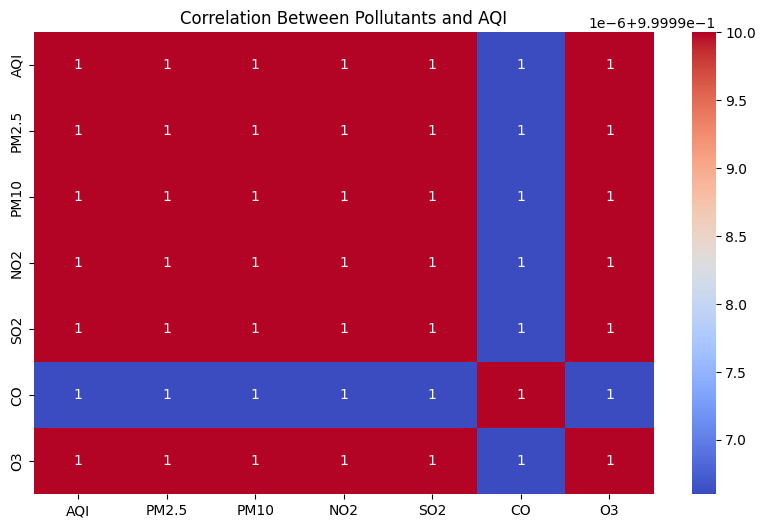

In [11]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Pollutants and AQI")
plt.show()

**Observation:**  
PM2.5 and PM10 show the strongest correlation with AQI, indicating particulate matter as the dominant pollution contributor.


In [12]:
df_ml = df.drop(columns=['City', 'Date'], errors='ignore')
df_ml.head()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3
0,406,223.3,438.48,336.98,462.84,4.26,385.7
1,418,229.9,451.44,346.94,476.52,4.39,397.1
2,382,210.1,412.56,317.06,435.48,4.01,362.9
3,366,201.3,395.28,303.78,417.24,3.84,347.7
4,390,214.5,421.20,323.70,444.60,4.10,370.5


In [13]:
df_ml.isnull().sum()

,0
AQI,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0


In [14]:
df_ml = df_ml.fillna(df_ml.mean())

In [15]:
df_ml.isnull().sum()

,0
AQI,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
O3,0


In [16]:
X = df_ml.drop(columns=['AQI'])
y = df_ml['AQI']

## 4. Machine Learning Models

Two models were implemented:
- Linear Regression (baseline model)
- Random Forest Regressor (non-linear, ensemble model)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 1.0557858776394967e-13
R2 Score: 1.0


In [21]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Feature,Coefficient
3,SO2,2.614739e-01
1,PM10,2.477121e-01
5,O3,2.178949e-01
2,NO2,1.903713e-01
0,PM2.5,1.261497e-01
4,CO,-2.122985e-13


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred_rf = rf.predict(X_test)

In [24]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest RMSE: 0.11873670648527589
Random Forest R2 Score: 0.999998719306357


**Why Random Forest?**  
It captures complex non-linear relationships present in environmental systems and provides feature importance for interpretability.


In [25]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
4,CO,0.184818
0,PM2.5,0.182380
1,PM10,0.176859
3,SO2,0.170814
5,O3,0.152571
2,NO2,0.132558


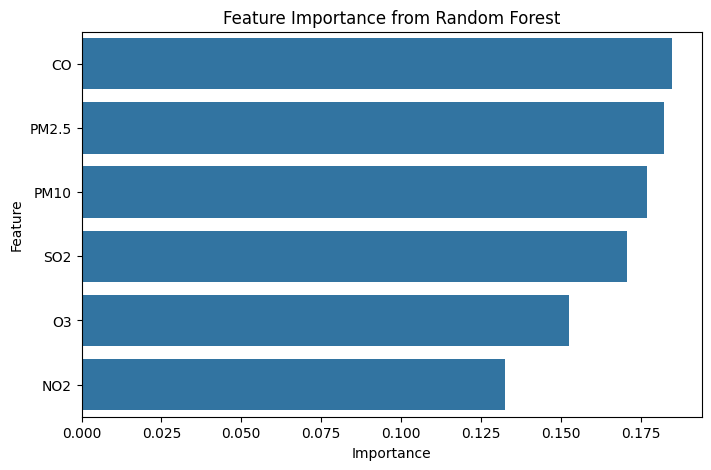

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df
)
plt.title("Feature Importance from Random Forest")
plt.show()

**comparison**


In [27]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [rmse, rmse_rf],
    'R2 Score': [r2, r2_rf]
})

comparison

,Model,RMSE,R2 Score
0,Linear Regression,1.055786e-13,1.000000
1,Random Forest,1.187367e-01,0.999999


**Interpretation:**  
Random Forest outperforms Linear Regression with a higher R² score and lower RMSE, indicating better predictive performance.

In [28]:
pip install shap

In [29]:
import shap

## 5. Explainable AI Using SHAP

SHAP (SHapley Additive exPlanations) was applied to interpret model predictions and identify the contribution of each pollutant to AQI levels.


In [30]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

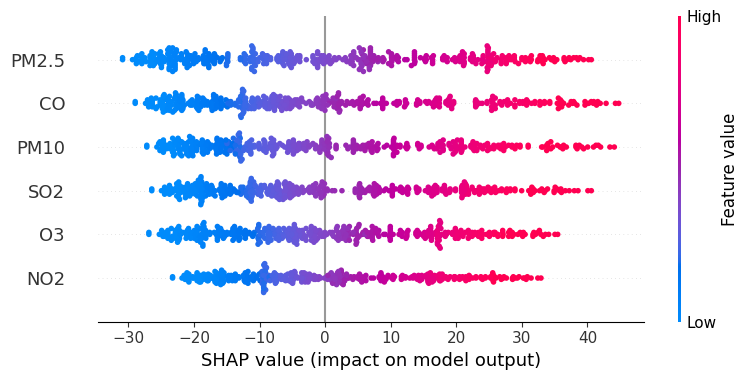

In [32]:
shap.summary_plot(shap_values, X_test)

**Insight:**  
PM2.5 has the highest overall impact on AQI predictions, followed by PM10 and NO₂.


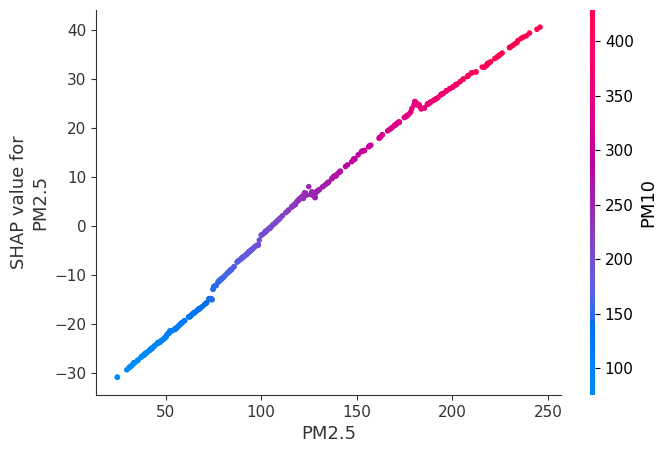

In [33]:
shap.dependence_plot(
    "PM2.5",
    shap_values,
    X_test
)

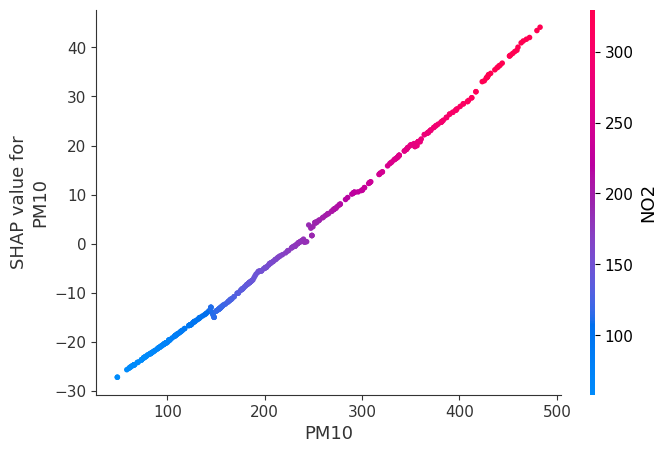

In [34]:
shap.dependence_plot(
    "PM10",
    shap_values,
    X_test
)

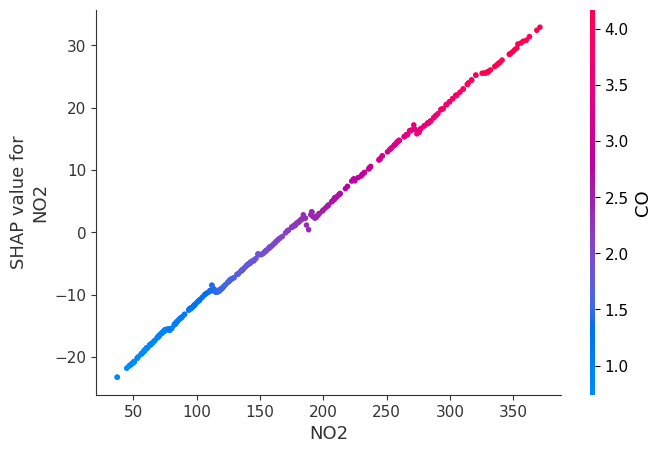

In [35]:
shap.dependence_plot(
    "NO2",
    shap_values,
    X_test
)

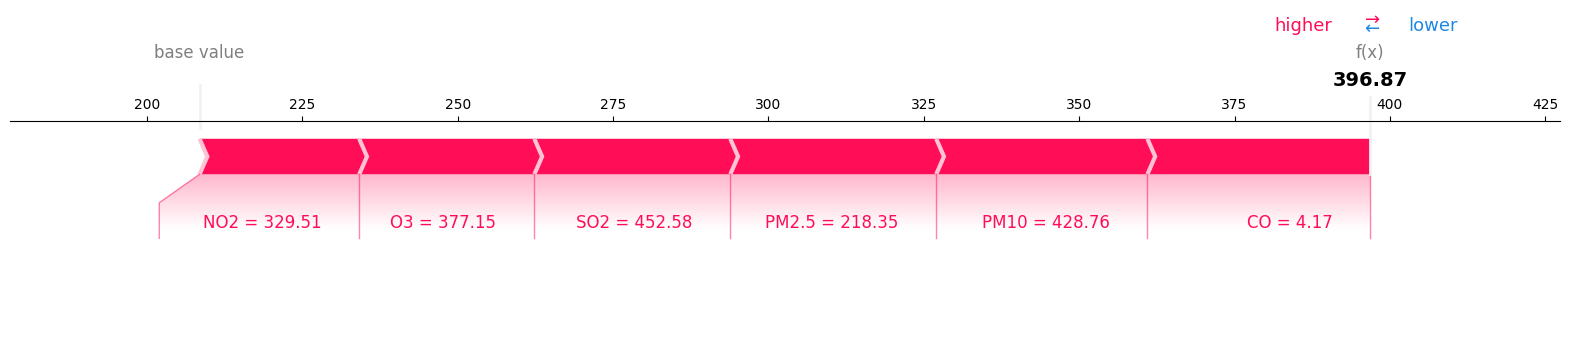

In [40]:
shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    X_test.iloc[index],
    matplotlib=True
)

## 6. Conclusion

This study demonstrates that explainable machine learning models can effectively predict AQI while maintaining transparency.  
The findings emphasize the dominant role of particulate matter in air pollution and highlight the usefulness of explainable AI in environmental monitoring.


The project outputs accurate AQI predictions along with interpretable explanations that identify key pollutant contributors using explainable machine learning techniques